<a href="https://colab.research.google.com/github/irfan030303/DIFG2130_kelas-A_25_2311533009_Irfan-Trianda/blob/main/Praktikum1/simpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = {'luas': [6,8,10,14,18],
        'harga':[7 ,9, 13, 17.5, 18]}
df = pd.DataFrame(data)
df


,luas,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


from matplotlib import pyplot as plt
df['luas'].plot(kind='hist', bins=20, title='luas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['harga'].plot(kind='hist', bins=20, title='harga')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='luas', y='harga', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['luas']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'luas'}, axis=1)
              .sort_values('luas', ascending=True))
  xs = counted['luas']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('luas', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('luas')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['harga']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'harga'}, axis=1)
              .sort_values('harga', ascending=True))
  xs = counted['harga']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('harga', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('harga')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['luas'].plot(kind='line', figsize=(8, 4), title='luas')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['harga'].plot(kind='line', figsize=(8, 4), title='harga')
plt.gca().spines[['top', 'right']].set_visible(False)

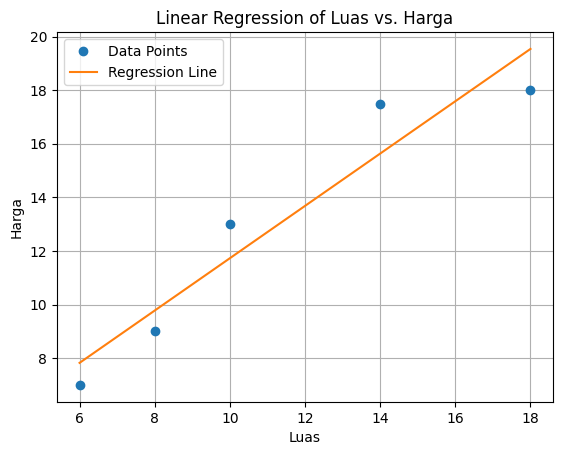

The linear equation is: y = 0.98x + 1.97


In [5]:
# prompt: buatkan garis persamaan liner pada luas dan harga

import matplotlib.pyplot as plt
import numpy as np

# Calculate the linear regression line
x = df['luas']
y = df['harga']
m, b = np.polyfit(x, y, 1)

# Plot the data points and the regression line
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x, m*x + b, '-', label='Regression Line')
plt.xlabel('Luas')
plt.ylabel('Harga')
plt.title('Linear Regression of Luas vs. Harga')
plt.legend()
plt.grid(True)
plt.show()

print(f"The linear equation is: y = {m:.2f}x + {b:.2f}")


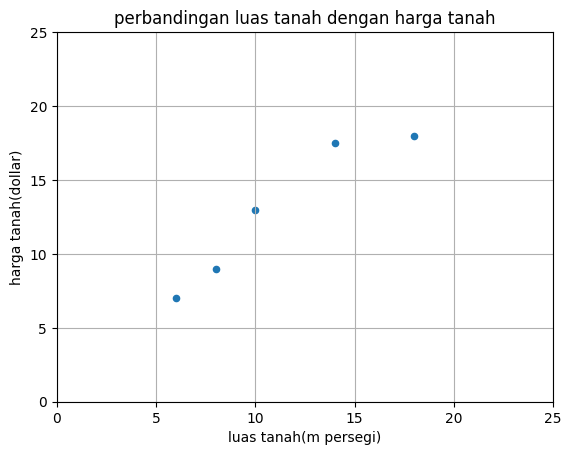

In [7]:
import matplotlib.pyplot as plt

df.plot(kind= 'scatter', x= 'luas', y='harga')
plt.title('perbandingan luas tanah dengan harga tanah')
plt.xlabel('luas tanah(m persegi)')
plt.ylabel('harga tanah(dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [11]:
import numpy as np
x=np.array(df['luas'])
y=np.array(df['harga'])

print(f'x: {x}')
print(f'y: {y}')

x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [12]:
x = x.reshape(-1,1)

print(f'X shape: {x.shape}')
print(f'x: {x}')

X shape: (5, 1)
x: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [16]:
X_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(X_vis)

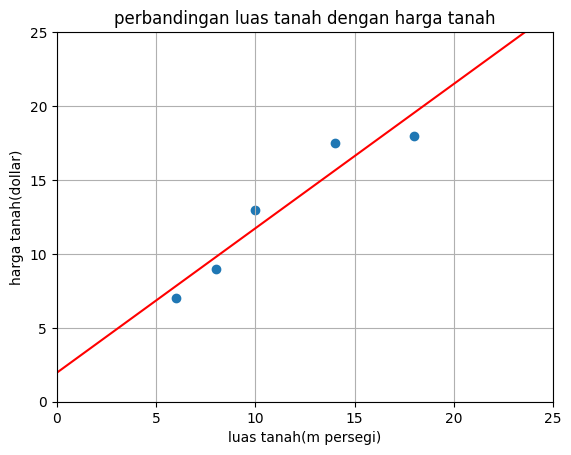

In [18]:
plt.scatter(x,y)
plt.plot(X_vis, y_vis, color = 'red')
plt.title('perbandingan luas tanah dengan harga tanah')
plt.xlabel('luas tanah(m persegi)')
plt.ylabel('harga tanah(dollar)')
#plt.xlim(0, 25)
#plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [19]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


In [20]:
luas_tanah = np.array([12,15,20]).reshape(-1,1)
print(luas_tanah.shape)
luas_tanah

(3, 1)


array([[12],
       [15],
       [20]])

In [21]:
harga_prediksi = model.predict(luas_tanah)
harga_prediksi

array([13.68103448, 16.60991379, 21.49137931])

In [22]:
for luas,hrg in zip(luas_tanah, harga_prediksi):
  print(f'luas_tanah {luas}: harga prediksi: {hrg}')

luas_tanah [12]: harga prediksi: 13.681034482758621
luas_tanah [15]: harga prediksi: 16.609913793103445
luas_tanah [20]: harga prediksi: 21.491379310344826


In [32]:
X_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

X_test = np.array([9,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])


In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6873061136400747


In [37]:
y_pred

array([10.75215517, 10.75215517, 12.70474138, 17.5862069 , 13.68103448])

In [38]:
y_test

array([11. ,  8.5, 15. , 18. , 11. ])